In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lumicks import pylake

%matplotlib inline

# Loading files
First we need to import the data files exported from Bluelake, in this case we are going import and visualize few images previously recorded.

In [2]:
file1 = pylake.File("data/20180611-160223 Scan 30.h5")
file2 = pylake.File("data/20180611-161216 Kymograph 6.h5")

# Inspect file content
To check the content of the file we can use the function 
```
print("file name")
``` 
to list all the items that are stored inside. In this case the file contains a single scan. 

In [3]:
print(file1)

File root metadata:
- Bluelake version: Unknown
- Description: 
- Experiment: 
- GUID: {F8BD9E0C-E6CB-4A57-A76C-86DAD7F91B5D}
- Export time (ns): 1528725818320394000
- File format version: 1

Calibration:
  16:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 43
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 338185
  Force 1y:
  - Data type: float64
  - Size: 338185
  Force 2x:
  - Data type: float64
  - Size: 338185
  Force 2y:
  - Data type: float64
  - Size: 338185
Info wave:
  Info wave:
  - Data type: uint8
  - Size: 338185
Photon count:
  Blue:
  - Data type: uint32
  - Size: 338185
  Green:
  - Data type: uint32
  - Size: 338185
  Red:
  - Data type: uint32
  - Size: 338185
Scan:
  30:
  - Data type: object
  - Size: 1



# Visualize images

We can now load the scan item and display it. We can plot original image alongside the three separate red, green, blue channels 

In [9]:
scan1 = file1.scans["30"]

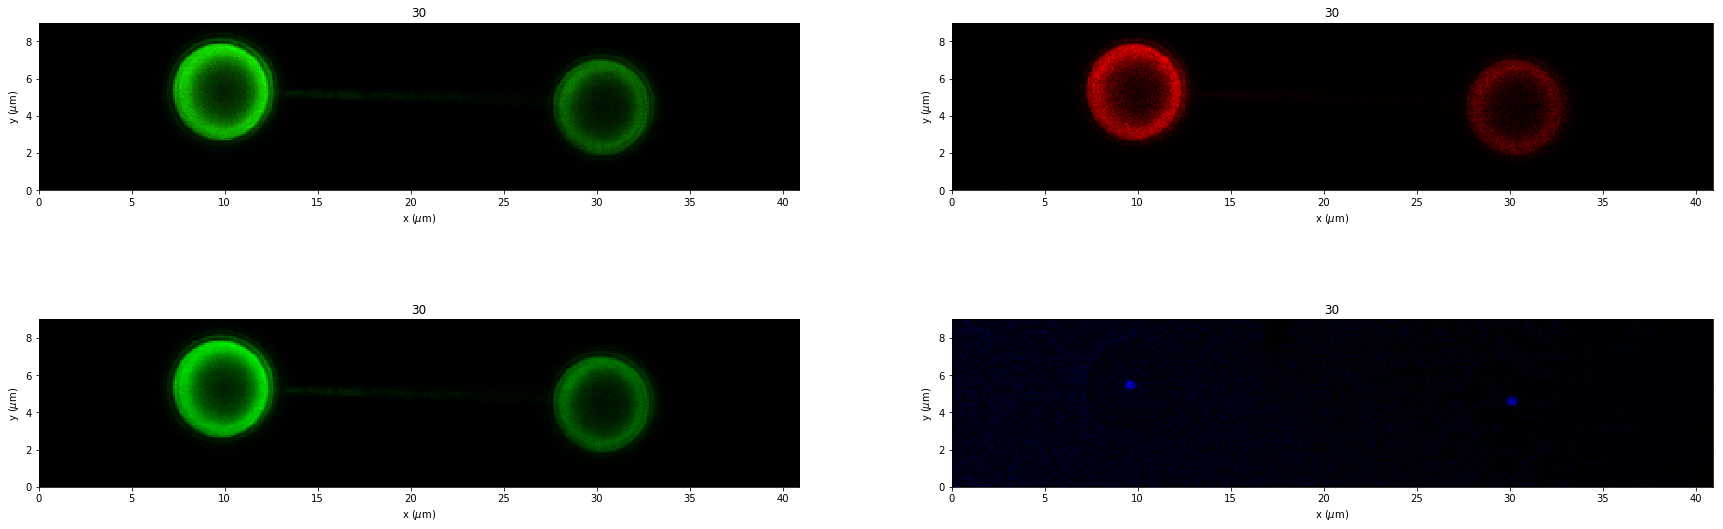

In [10]:
plt.figure(figsize=(30,10))
plt.subplot(221)
scan1.plot_rgb()
plt.subplot(222)
scan1.plot_red()
plt.subplot(223)
scan1.plot_green()
plt.subplot(224)
scan1.plot_blue()

We can also access the underlying raw image data and plot the profile for a single line of the scan:

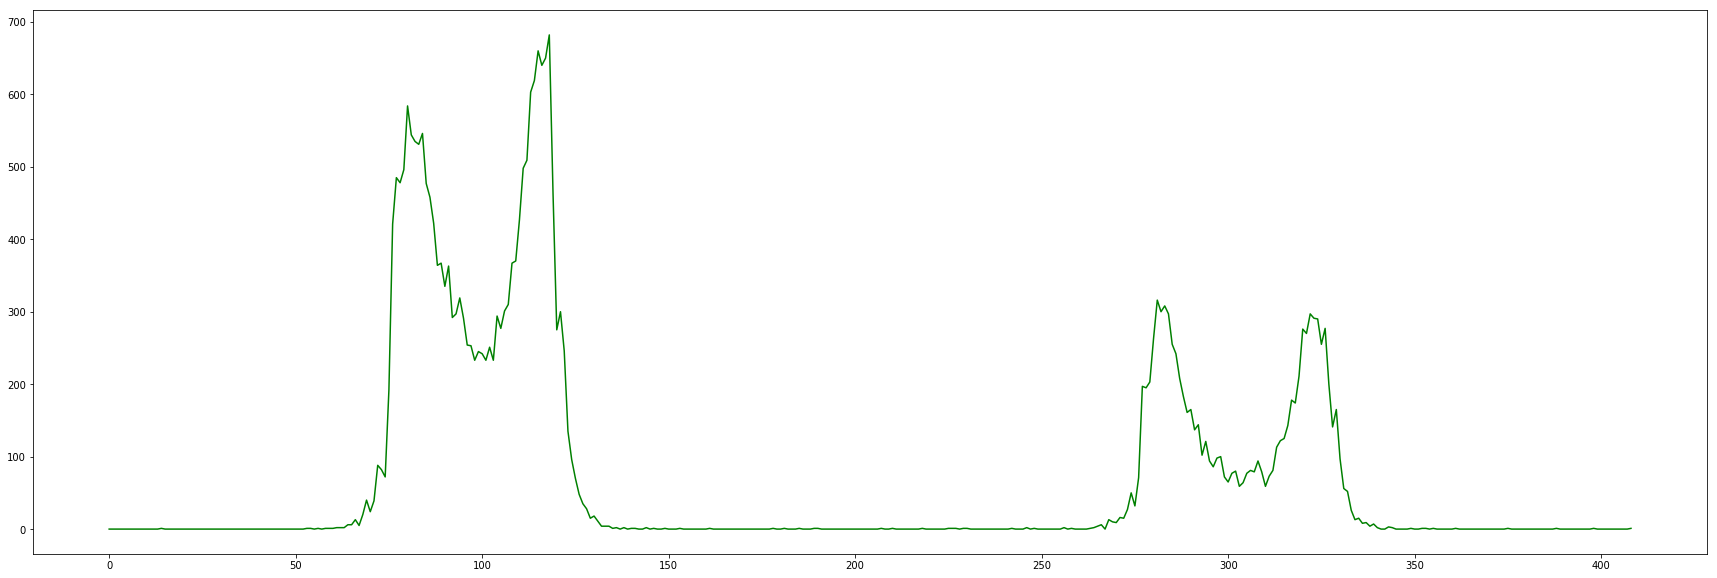

In [16]:
green_img = scan1.green_image
plt.figure(figsize=(30,10))
line = 50
plt.plot(green_img[line,:], 'g');

# Kymographs

We can also access kymograph items and visualize them alongside the time-correlated force trace:

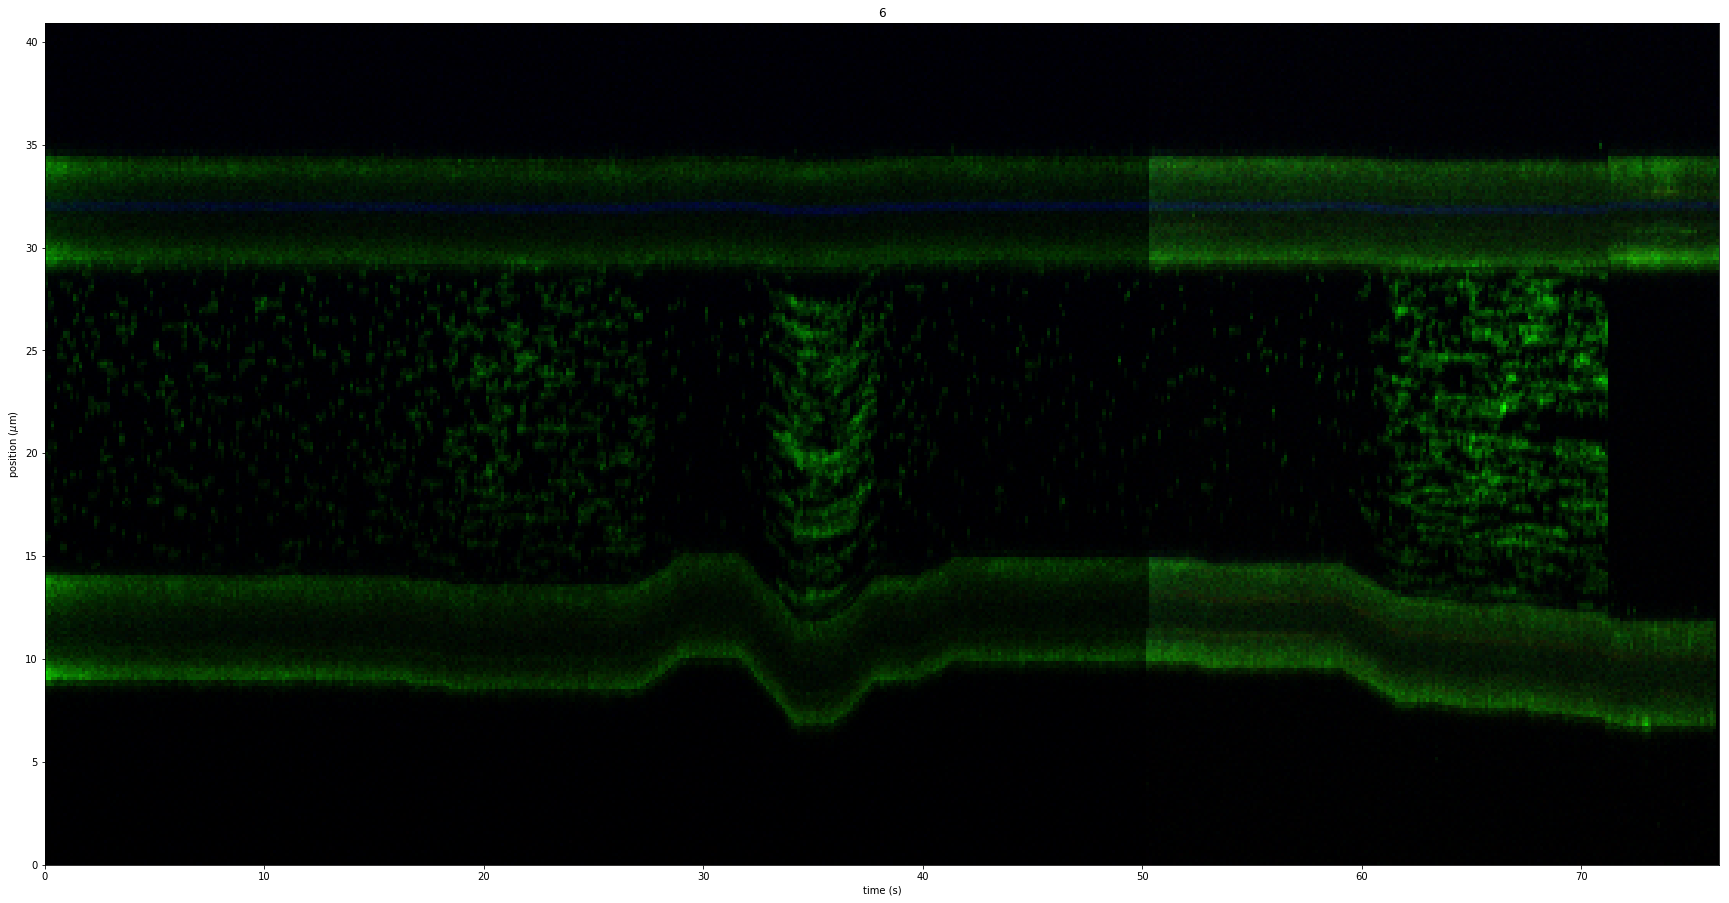

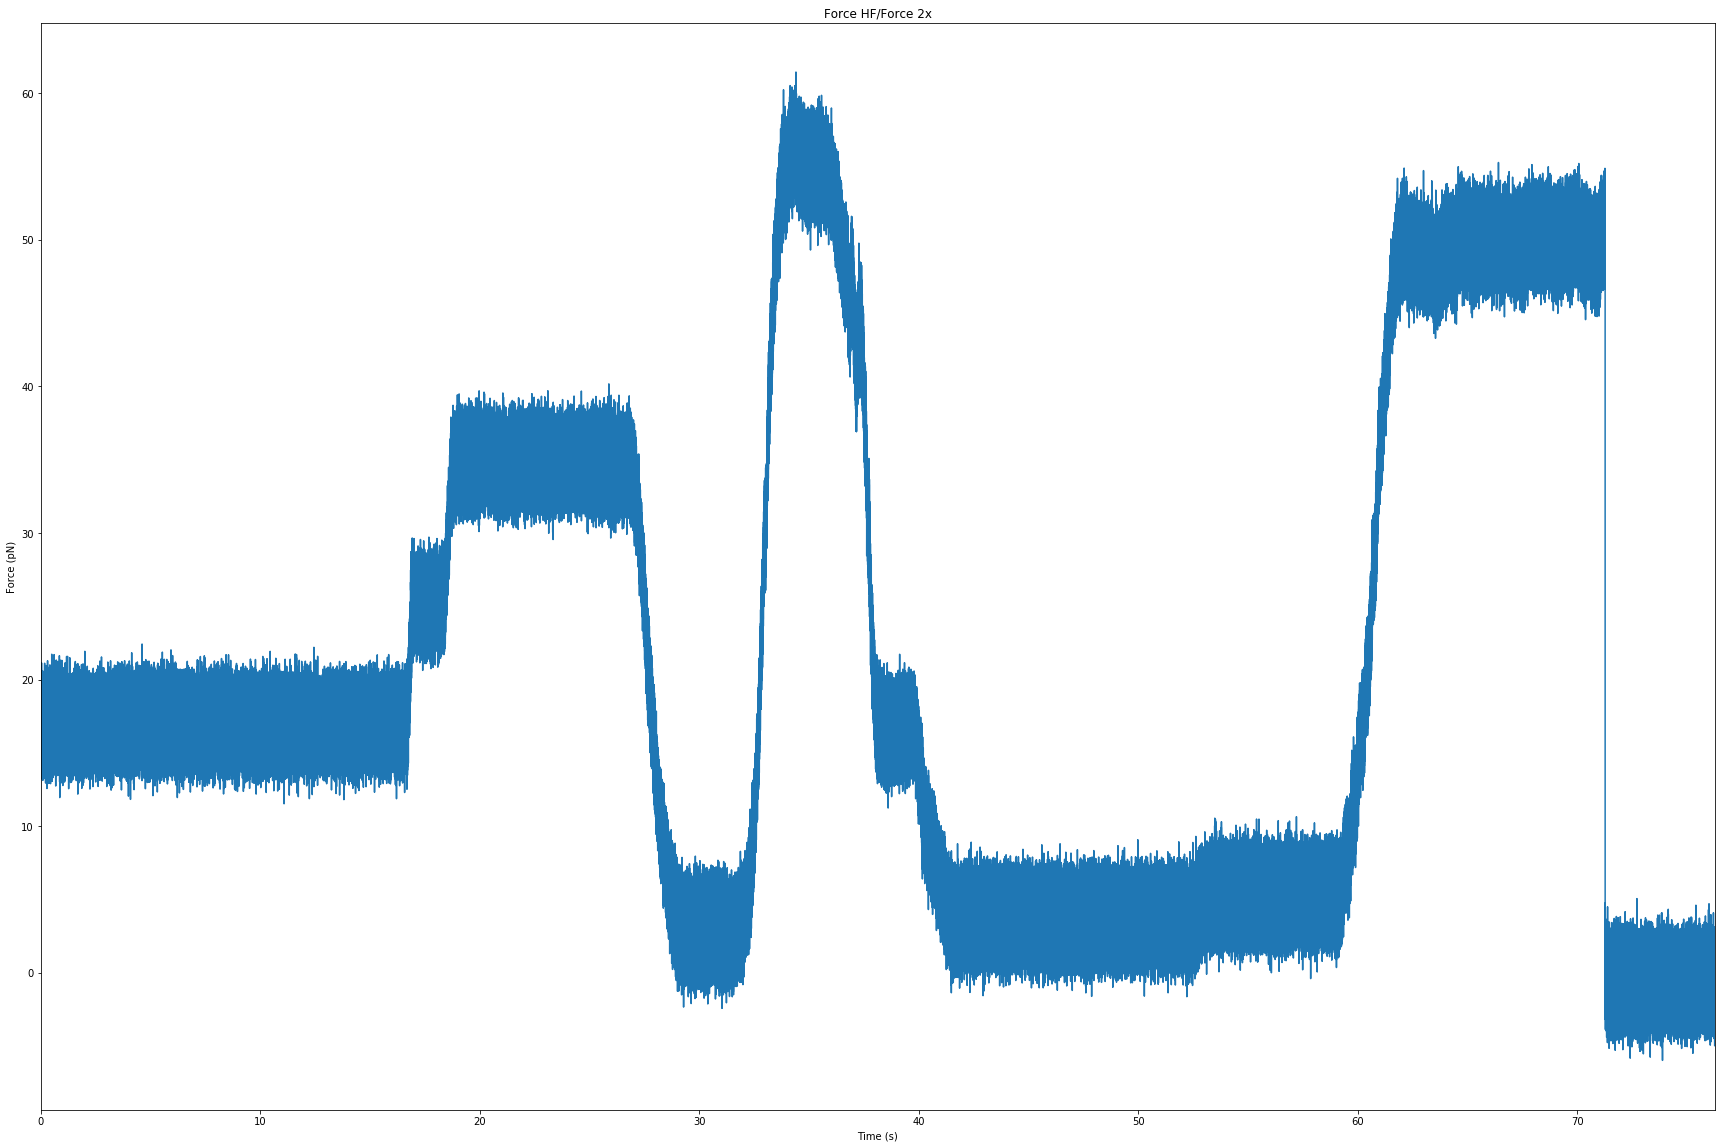

In [7]:
kymo1 = file2.kymos["6"]
ax = plt.figure(figsize=(30,20))
kymo1.plot_rgb()
axes = plt.gca()
xmin, xmax = axes.get_xlim()

plt.figure(figsize=(30,20))
plt.xlim(xmin,xmax)
file2.force2x.plot()

Also for kymograph we can plot the profile for a single line.

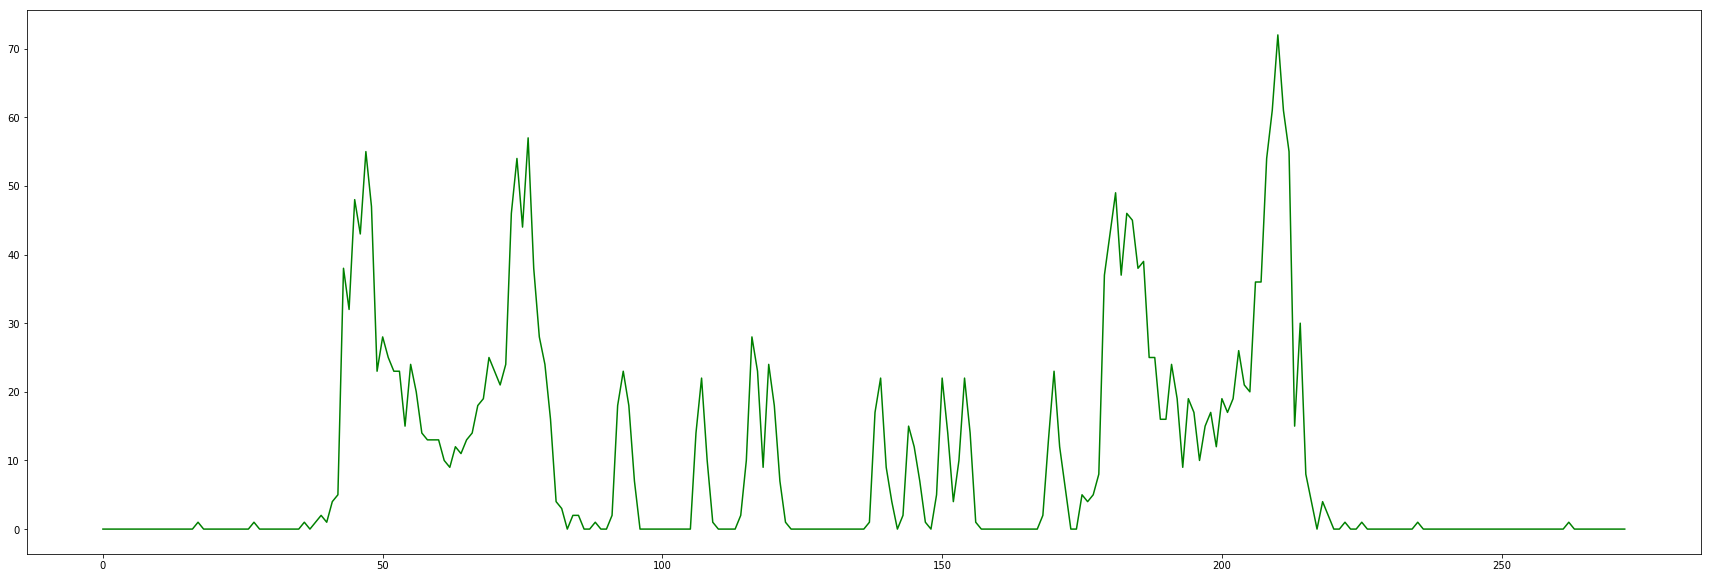

In [14]:
green_img = kymo1.green_image
plt.figure(figsize=(30,10))
line = 37
plt.plot(green_img[line,:], 'g');

# Export images

We can also save the images in tiff format to be processed with other tools (e.g. ImageJ) 

In [9]:
kymo1.save_tiff("kymo1.tiff")